In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




* torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)


`Randomly` change the brightness, contrast, saturation and hue of an image. If the image is torch Tensor, it is expected to have […, 1 or 3, H, W] shape, where … means an arbitrary number of leading dimensions. If img is PIL Image, mode “1”, “I”, “F” and modes with transparency (alpha channel) are not supported.

* torchvision.transforms.functional.adjust_brightness(img: Tensor, brightness_factor: float) 

Adjust brightness of an image.

In [2]:
import os 
from datetime import datetime
import cv2

import time
from matplotlib import pyplot as plt
from PIL import Image
project_directory = '/content/drive/MyDrive/MLDL'
os.chdir(project_directory)
import random
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF



start_time = time.time()
try:
  import faiss
except:
  !pip install faiss-gpu
!pip install faiss-cpu 

try:
   import torchscan
except:
  !pip install torchscan

try:
    import timm
except:
  !pip install timm
try:
   import  transformers
except:
  !pip install transformers

print('time is {} '.format(time.time() -start_time  ))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 10.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 84.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 29.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.7 MB/s eta 0:00:00
time is 33.18874621391

# 1. torch adjust_brightness


7416


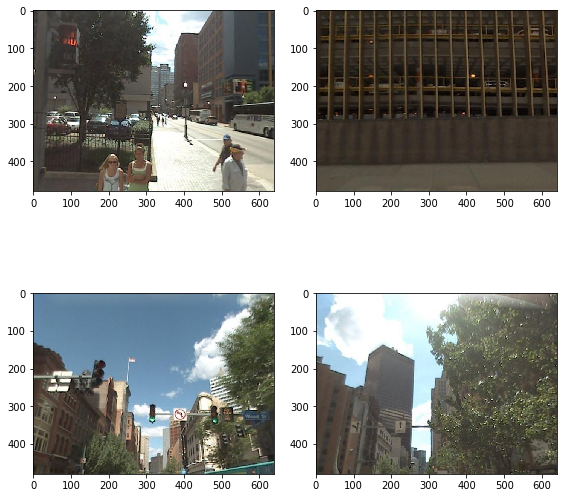

In [5]:
sample_images = os.listdir('/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/queries')
print(len(sample_images))
fig, axs = plt.subplots(2,2,figsize=(8,8))
plt.tight_layout()
random_list = []
for i in range(4):
        random_list.append(random.randint(0, len(sample_images)))
index = 1
for c in random_list:
 
  img = cv2.imread('/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/queries/'+sample_images[c])
  img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
  plt.subplot(2,2, index)   
  index+=1        
  plt.imshow(img, cmap="gray",interpolation='none')

In [3]:
class adjust_brightness:   
    def __init__(self, brightness_factor):
        self.brightness_factor = brightness_factor
    def __call__(self, x):
        x = x.ToTensor()       
        return  TF.functional.adjust_brightness(x, self.brightness_factor)

The cell below is created so the output can be used in the report

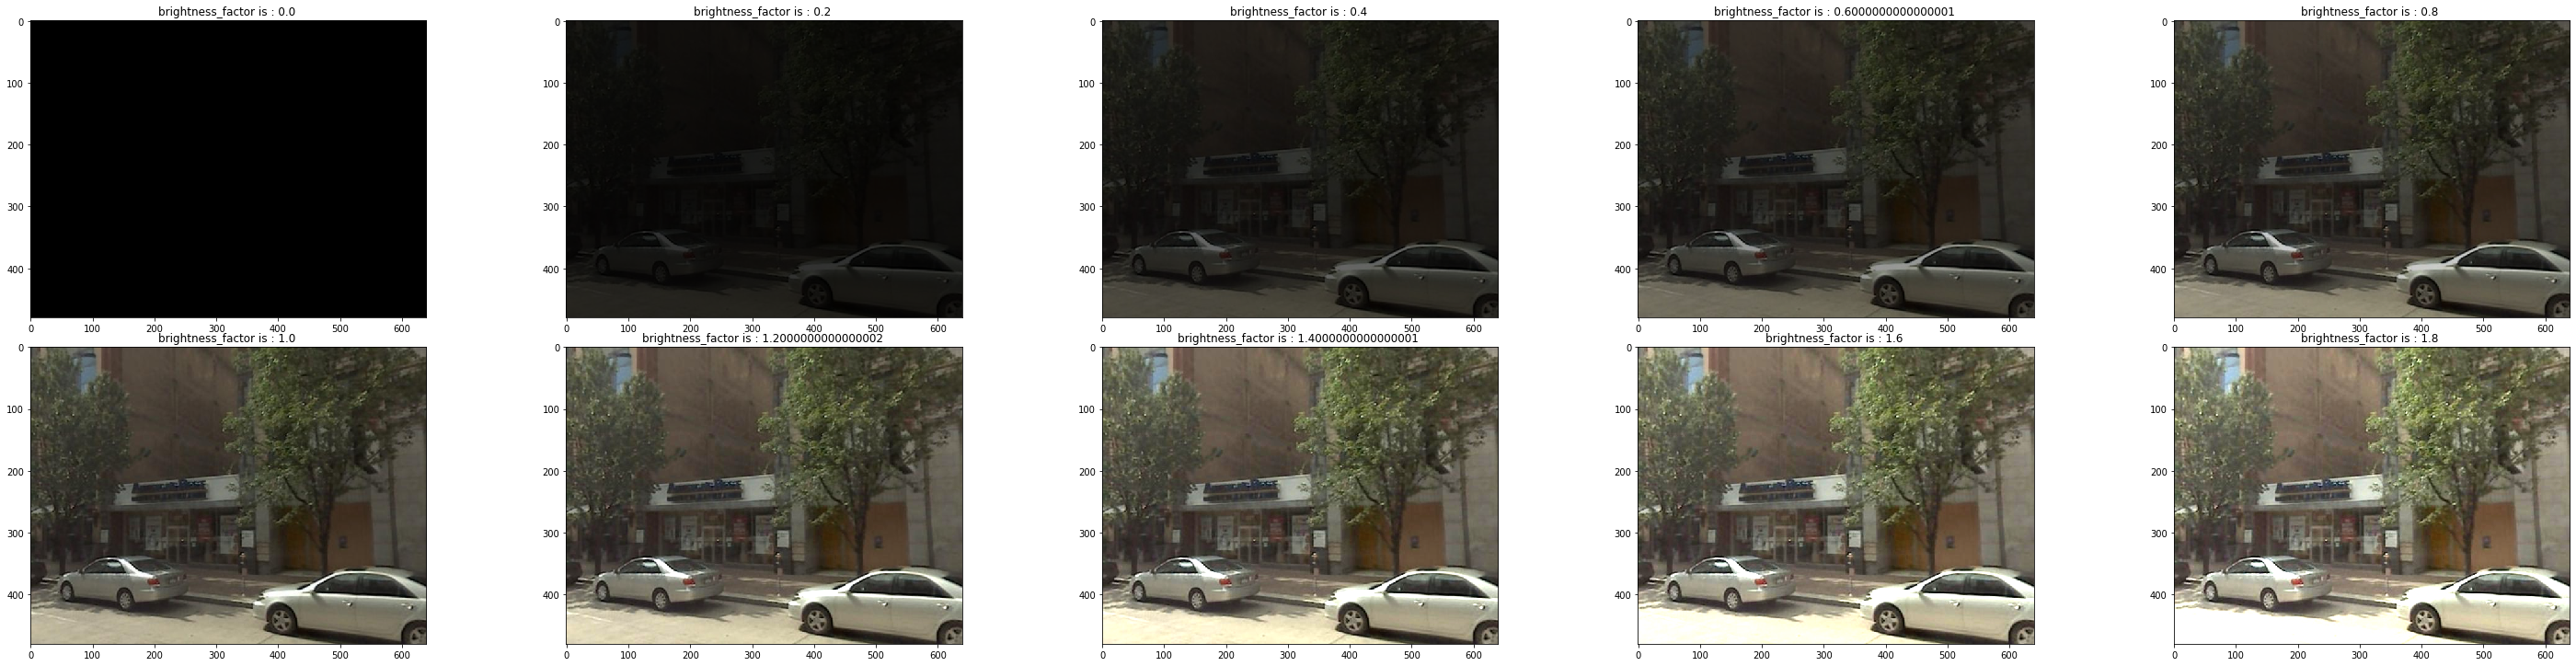

In [8]:
fig, axs = plt.subplots(2,10,figsize=(40,10))
plt.tight_layout()


random_list = []
# Set a length of the list to 10
for i in range(1):
    # any random numbers from 0 to 1000
    random_list.append(random.randint(0, len(sample_images)))
index = 1
img = cv2.imread('/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/queries/'+sample_images[c])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# Define a transform to convert
# the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])
  
# Convert the image to Torch tensor
img= transform(img)
for c in range(10):
  brightness_factor =0.2*c
  
  transformed_img = TF.adjust_brightness(img, brightness_factor)
  plt.subplot(2,5, index)   
  index+=1        
  plt.imshow(transformed_img.permute(1, 2, 0) , cmap="gray",interpolation='none')
  plt.title("brightness_factor is : {} ".format(brightness_factor))

The cell below is an experiment in order to see how much we can change the brightness and have a meaningful image

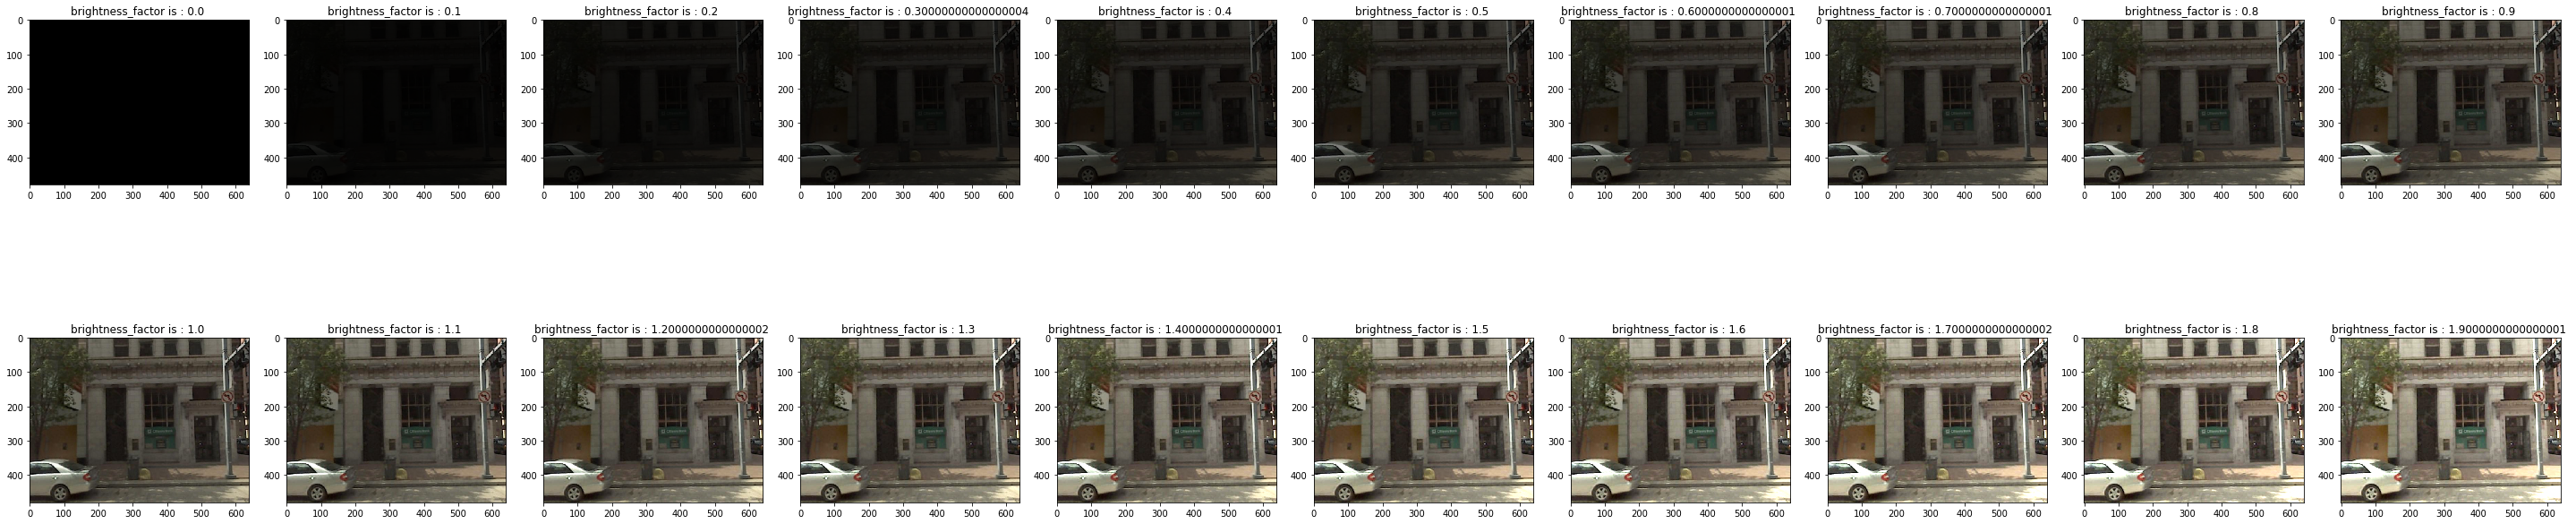

In [ ]:
fig, axs = plt.subplots(2,10,figsize=(40,10))
plt.tight_layout()


random_list = []
# Set a length of the list to 10
for i in range(1):
    # any random numbers from 0 to 1000
    random_list.append(random.randint(0, len(sample_images)))
index = 1
img = cv2.imread('/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/queries/'+sample_images[c])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# Define a transform to convert
# the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])
  
# Convert the image to Torch tensor
img= transform(img)
for c in range(20):
  brightness_factor =0.1*c
  
  transformed_img = TF.adjust_brightness(img, brightness_factor)
  plt.subplot(2,10, index)   
  index+=1        
  plt.imshow(transformed_img.permute(1, 2, 0) , cmap="gray",interpolation='none')
  plt.title("brightness_factor is : {} ".format(brightness_factor))

# 2. train and eval on pitt30k

## 2.1 continue previous

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')

!python3 train.py --dataset_name=pitts30k --datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg' \
--backbone=resnet18conv4\
--aggregation=netvlad\
--epochs_num 11\
--num_workers=2\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data'\
--resume  '/content/drive/MyDrive/MLDL/results/base_netvlad/resume_training/2023-01-12_09-09-47/best_model.pth'\
--brightness_factor_min 0.1\
--brightness_factor_max  0.3


INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=0.3, brightness_factor_min=0.1, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='pitts30k', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=11, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=2, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/base_netvlad/resume_training/2023-01-12_09-09-47/best_model.pth', saturat

###2.1.1 testing tokyo_night

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-12_15-12-35/last_model.pth'\
--dataset_name=tokyo_night \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/results/tokyo_night'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=2.0, brightness_factor_min=1.0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_night', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-12_15-12-35/last_model.pth', saturation=0, 

## 2.2 continue training previous with different brightness factor

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')

!python3 train.py --dataset_name=pitts30k --datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg' \
--backbone=resnet18conv4\
--aggregation=netvlad\
--epochs_num 11\
--num_workers=2\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/expri2'\
--resume  '/content/drive/MyDrive/MLDL/results/base_netvlad/resume_training/2023-01-12_09-09-47/best_model.pth'\
--brightness_factor_min 0.3\
--brightness_factor_max  0.9

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=0.9, brightness_factor_min=0.3, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='pitts30k', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=11, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=2, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/base_netvlad/resume_training/2023-01-12_09-09-47/best_model.pth', saturat

### 2.2.1 testing tokyo_night

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/expri2/2023-01-12_18-31-06/last_model.pth'\
--dataset_name=tokyo_night \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/expri2/tokyo_night'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=2.0, brightness_factor_min=1.0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_night', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/netvlad_aug_data/expri2/2023-01-12_18-31-06/last_model.pth', saturat

##2.3 train from start

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')

!python3 train.py --dataset_name=pitts30k --datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg' \
--backbone=resnet18conv4\
--aggregation=netvlad\
--epochs_num 5\
--num_workers=2\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data'\
--brightness_factor_min 0.3\
--brightness_factor_max  0.9


INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=0.9, brightness_factor_min=0.3, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='pitts30k', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=5, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=2, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume=None, saturation=0, save_dir='/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-27_14-01-19', seed=0

### 2.3.1 testing tokyo_night

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-27_14-01-19/best_model.pth'\
--dataset_name=tokyo_night \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/expri3/tokyo_night'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=2.0, brightness_factor_min=1.0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_night', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-27_14-01-19/best_model.pth', saturation=0, 

# 3. testing on different datasets


---



---



since first experimetn has better perormance on tokyo night, we check its performance on other datasets

## 3.1 testing pitts30k

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-12_15-12-35/last_model.pth'\
--dataset_name=pitts30k \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/results/pitts30k'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=2.0, brightness_factor_min=1.0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='pitts30k', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-12_15-12-35/last_model.pth', saturation=0, sav

## 3.2 testing sf_xs

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/sf-xs' \
--resume  '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-12_15-12-35/last_model.pth'\
--dataset_name 'sf_xs'  \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/results/sf_xs'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=2.0, brightness_factor_min=1.0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='sf_xs', datasets_folder='/content/drive/MyDrive/MLDL/sf-xs', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-12_15-12-35/last_model.pth', saturation=0, save_dir='/c

## 3.3 testing tokyo_xs

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/data_augmentation')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-12_15-12-35/last_model.pth'\
--dataset_name=tokyo_xs \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/netvlad_aug_data/results/tokyo_xs'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, brightness_factor_max=2.0, brightness_factor_min=1.0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_xs', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/netvlad_aug_data/2023-01-12_15-12-35/last_model.pth', saturation=0, sav